# Individu - HA, Muhammad Fachrudin Firdaus - 2206819331 

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
train = pd.read_csv('admission.csv')
#ignore test
test = pd.read_csv('test.csv')

In [212]:
train.nunique()

SNO                                12551
MRD No.                            10189
D.O.A                               1167
D.O.D                               1178
AGE                                   96
GENDER                                 2
RURAL                                  2
TYPE OF ADMISSION-EMERGENCY/OPD        2
month year                            24
DURATION OF STAY                      51
duration of intensive unit stay       43
SMOKING                                2
ALCOHOL                                2
DM                                     2
HTN                                    2
CAD                                    2
PRIOR CMP                              2
CKD                                    2
TLC                                  421
PLATELETS                            639
GLUCOSE                              509
UREA                                 313
CREATININE                           434
BNP                                 1222
RAISED CARDIAC E

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              12551 non-null  int64 
 1   MRD No.                          12551 non-null  object
 2   D.O.A                            12551 non-null  object
 3   D.O.D                            12551 non-null  object
 4   AGE                              12551 non-null  int64 
 5   GENDER                           12551 non-null  object
 6   RURAL                            12551 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object
 8   month year                       12551 non-null  object
 9   DURATION OF STAY                 12551 non-null  int64 
 10  duration of intensive unit stay  12551 non-null  int64 
 11  SMOKING                          12551 non-null  int64 
 12  ALCOHOL                         

In [214]:
# Drop Admission Number karena tidak berisi informasi apapun
train.drop(['MRD No.'],axis=1, inplace=True)
test.drop(['MRD No.'],axis=1, inplace=True)

# Drop Serial Number karena tidak berisi informasi apapun
train.drop(['SNO'],axis=1, inplace=True)
test.drop(['SNO'],axis=1, inplace=True)

# Drop D.O.A karena sudah direpresentasikan melalui kolom lain
train.drop(['D.O.A'],axis=1, inplace=True)
test.drop(['D.O.A'],axis=1, inplace=True)

# Drop D.O.D karena sudah direpresentasikan melalui kolom lain
train.drop(['D.O.D'],axis=1, inplace=True)
test.drop(['D.O.D'],axis=1, inplace=True)

In [215]:
train['GENDER'] = train['GENDER'].map({'M': 1, 'F': 0})
test['GENDER'] = test['GENDER'].map({'M': 1, 'F': 0})

train['RURAL'] = train['RURAL'].map({'R': 1, 'U': 0})
test['RURAL'] = test['RURAL'].map({'R': 1, 'U': 0})

In [216]:
train['TYPE OF ADMISSION-EMERGENCY/OPD'] = train['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})
test['TYPE OF ADMISSION-EMERGENCY/OPD'] = test['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})

In [217]:
train.loc[train['TLC'] == 'EMPTY', 'TLC'] = np.nan
train['TLC'] = train['TLC'].astype('Float64')

test.loc[test['TLC'] == 'EMPTY', 'TLC'] = np.nan
test['TLC'] = test['TLC'].astype('Float64')

In [218]:
train.loc[train['PLATELETS'] == 'EMPTY', 'PLATELETS'] = np.nan
train['PLATELETS'] = train['PLATELETS'].astype('Float64')

test.loc[test['PLATELETS'] == 'EMPTY', 'PLATELETS'] = np.nan
test['PLATELETS'] = test['PLATELETS'].astype('Float64')

In [219]:
train.loc[train['GLUCOSE'] == 'EMPTY', 'GLUCOSE'] = np.nan
train['GLUCOSE'] = train['GLUCOSE'].astype('Float64')

test.loc[test['GLUCOSE'] == 'EMPTY', 'GLUCOSE'] = np.nan
test['GLUCOSE'] = test['GLUCOSE'].astype('Float64')

In [220]:
train.loc[train['UREA'] == 'EMPTY', 'UREA'] = np.nan
train['UREA'] = train['UREA'].astype('Float64')

test.loc[test['UREA'] == 'EMPTY', 'UREA'] = np.nan
test['UREA'] = test['UREA'].astype('Float64')

In [221]:
train.loc[train['CREATININE'] == 'EMPTY', 'CREATININE'] = np.nan
train['CREATININE'] = train['CREATININE'].astype('Float64')

test.loc[test['CREATININE'] == 'EMPTY', 'CREATININE'] = np.nan
test['CREATININE'] = test['CREATININE'].astype('Float64')

In [222]:
train.loc[train['BNP'] == 'EMPTY', 'BNP'] = np.nan
train['BNP'] = train['BNP'].astype('Float64')

test.loc[test['BNP'] == 'EMPTY', 'BNP'] = np.nan
test['BNP'] = test['BNP'].astype('Float64')

In [223]:
train[['month', 'year']] = train['month year'].str.split('-', expand=True)
test[['month', 'year']] = test['month year'].str.split('-', expand=True)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

train['year'] = train['year'].astype(int)
test['year'] = test['year'].astype(int)

train['month'] = train['month'].map(month_mapping)
test['month'] = test['month'].map(month_mapping)


train.drop(['month year'],axis=1, inplace=True)
test.drop(['month year'],axis=1, inplace=True)

In [224]:
train.loc[train['EF'] == 'EMPTY', 'EF'] = np.nan
train['EF'] = train['EF'].astype('Float64')

test.loc[test['EF'] == 'EMPTY', 'EF'] = np.nan
test['EF'] = test['EF'].astype('Float64')

In [225]:
train.loc[train['CHEST INFECTION'] == '\\', 'CHEST INFECTION'] = np.nan
train['CHEST INFECTION'] = train['CHEST INFECTION'].astype('Float64')

test.loc[test['CHEST INFECTION'] == 'EMPTY', 'CHEST INFECTION'] = np.nan
test['CHEST INFECTION'] = test['CHEST INFECTION'].astype('Float64')

In [226]:
train.loc[train['HB'] == 'EMPTY', 'HB'] = np.nan
train['HB'] = train['HB'].astype('Float64')

test.loc[test['HB'] == 'EMPTY', 'HB'] = np.nan
test['HB'] = test['HB'].astype('Float64')

In [227]:
outcome_mapping = {
    'DAMA': 0,
    'DISCHARGE': 1,
    'EXPIRY': 2
}

train['OUTCOME'] = train['OUTCOME'].map(outcome_mapping)

In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE                              12551 non-null  int64  
 1   GENDER                           12551 non-null  int64  
 2   RURAL                            12551 non-null  int64  
 3   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  int64  
 4   DURATION OF STAY                 12551 non-null  int64  
 5   duration of intensive unit stay  12551 non-null  int64  
 6   SMOKING                          12551 non-null  int64  
 7   ALCOHOL                          12551 non-null  int64  
 8   DM                               12551 non-null  int64  
 9   HTN                              12551 non-null  int64  
 10  CAD                              12551 non-null  int64  
 11  PRIOR CMP                        12551 non-null  int64  
 12  CKD               

In [229]:
train.isna().sum()

AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
DURATION OF STAY                      0
duration of intensive unit stay       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
TLC                                  33
PLATELETS                            37
GLUCOSE                             649
UREA                                 28
CREATININE                           35
BNP                                7141
RAISED CARDIAC ENZYMES                0
EF                                 1271
SEVERE ANAEMIA                        0
ANAEMIA                               0
STABLE ANGINA                         0
ACS                                   0


In [230]:
test.isna().sum()

AGE                                  0
GENDER                               0
RURAL                                0
TYPE OF ADMISSION-EMERGENCY/OPD      0
DURATION OF STAY                     0
duration of intensive unit stay      0
SMOKING                              0
ALCOHOL                              0
DM                                   0
HTN                                  0
CAD                                  0
PRIOR CMP                            0
CKD                                  0
HB                                  17
TLC                                 18
PLATELETS                           19
GLUCOSE                             89
UREA                                18
CREATININE                          22
BNP                                930
RAISED CARDIAC ENZYMES               0
EF                                 168
SEVERE ANAEMIA                       0
ANAEMIA                              0
STABLE ANGINA                        0
ACS                      

In [231]:
train = train.drop('BNP', axis=1)
test = test.drop('BNP', axis=1)

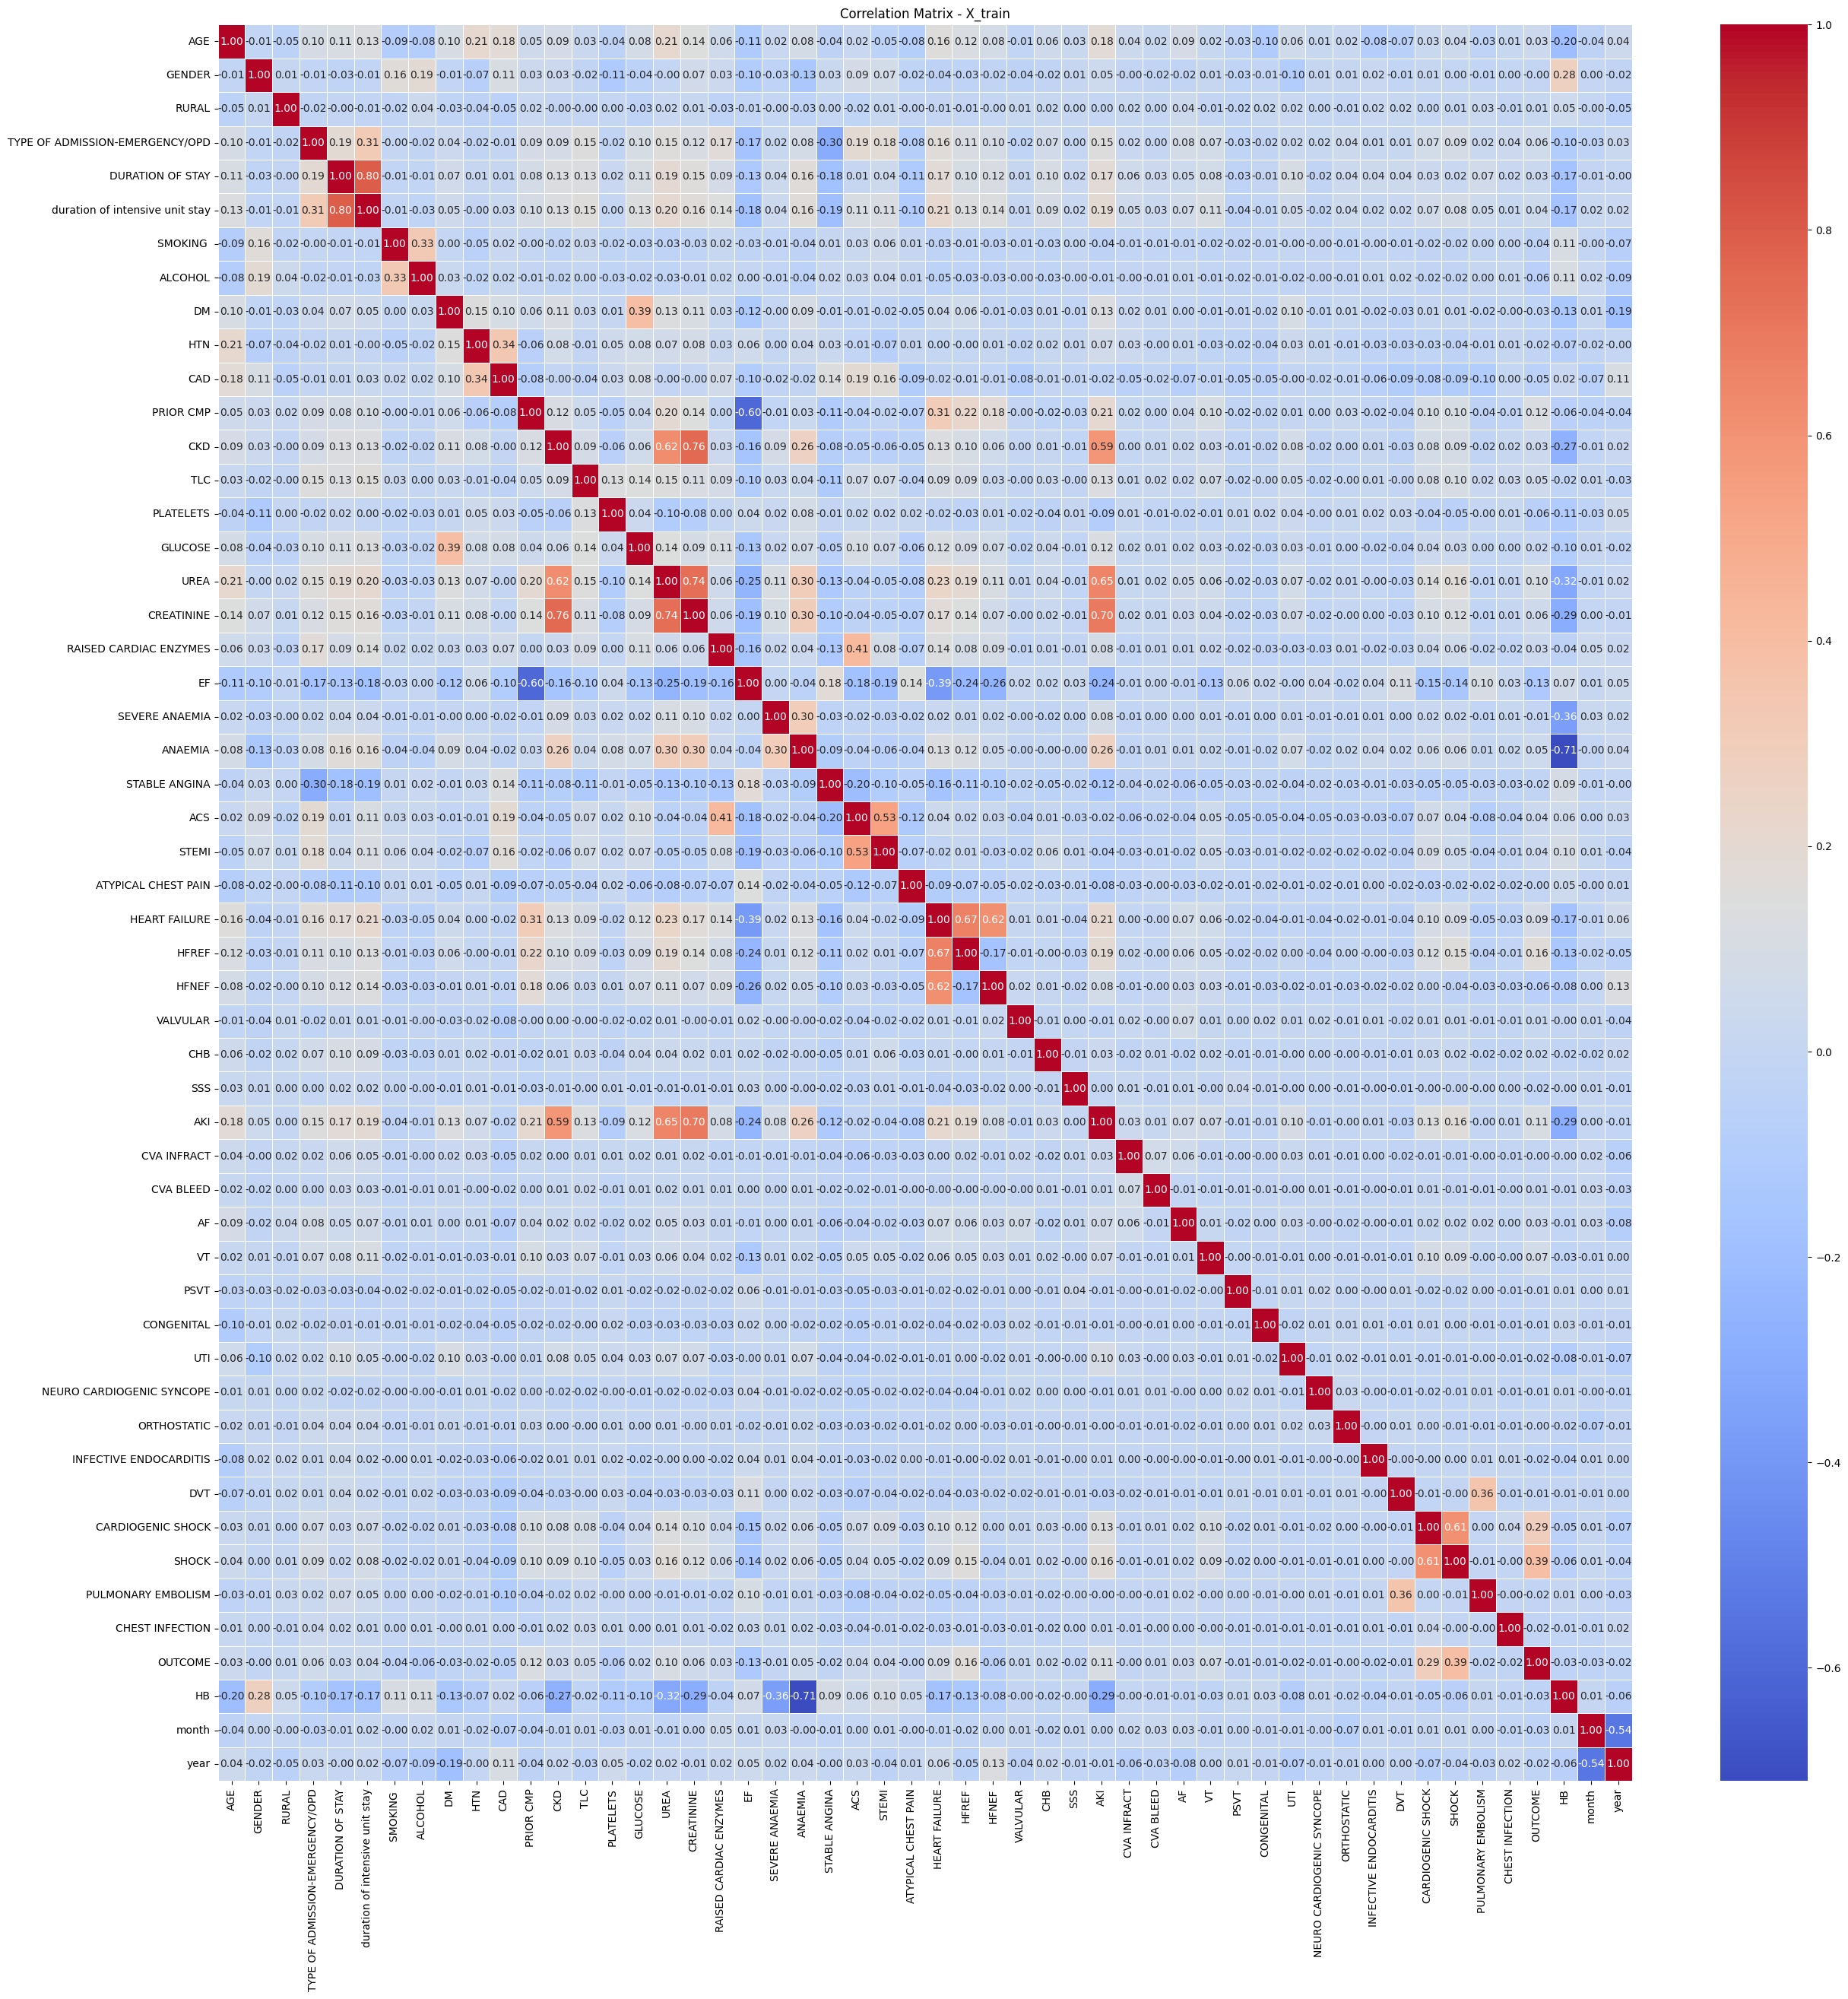

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = train.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - X_train')
plt.show()

In [233]:
train = train.fillna(train.median())
test = test.fillna(train.median())

# add new feature sum of disease
disease_columns = train.columns[train.columns.get_loc('DM'):train.columns.get_loc('CKD')+1].tolist()
disease_columns += train.columns[train.columns.get_loc('SEVERE ANAEMIA'):train.columns.get_loc('CHEST INFECTION')+1].tolist()
train['sum_disease'] = train[disease_columns].sum(axis=1)
test['sum_disease'] = test[disease_columns].sum(axis=1)
print("ashiap")

ashiap


In [234]:
train.columns

Index(['AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'DURATION OF STAY', 'duration of intensive unit stay', 'SMOKING ',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'OUTCOME', 'HB', 'month',
       'year', 'sum_disease'],
      dtype='object')

In [235]:
import numpy as np

train_with_outlier = train.copy()
test_with_outlier = test.copy()

print(train.shape)

def remove_outliers_iqr(df, multiplier=1.5):
    original_columns = df.columns  # Store the original column order
    for column in df.select_dtypes(include=[np.number]).columns:
        if df[column].nunique() == 2:  # Exclude boolean columns
            print(column)
            continue
        if column == 'OUTCOME':
            continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df = df.reindex(columns=original_columns)  # Reindex to the original column order
    return df

train = remove_outliers_iqr(train)

print(train.shape)


(12551, 53)
GENDER
RURAL
TYPE OF ADMISSION-EMERGENCY/OPD
SMOKING 
ALCOHOL
DM
HTN
CAD
PRIOR CMP
CKD
RAISED CARDIAC ENZYMES
SEVERE ANAEMIA
ANAEMIA
STABLE ANGINA
ACS
STEMI
ATYPICAL CHEST PAIN
HEART FAILURE
HFREF
HFNEF
VALVULAR
CHB
SSS
AKI
CVA INFRACT
CVA BLEED
AF
VT
PSVT
CONGENITAL
UTI
NEURO CARDIOGENIC SYNCOPE
ORTHOSTATIC
INFECTIVE ENDOCARDITIS
DVT
CARDIOGENIC SHOCK
SHOCK
PULMONARY EMBOLISM
CHEST INFECTION
(8478, 53)


# Klasifikasi

## Cross Validation

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, SVMSMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.pipeline import Pipeline
# XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate
from catboost import CatBoostClassifier

X = train.drop('OUTCOME', axis=1)
y = train['OUTCOME']

#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an XGBClassifier model
model = CatBoostClassifier(random_state=42)

# Define the sampling techniques including the baseline without any sampling
sampling_techniques = {
    'NoSampling': None,
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'NearMiss': NearMiss(),
    'TomekLinks': TomekLinks()
}

# Define the scorer
scorer = {'f1_micro': make_scorer(f1_score, average='micro'),
          'f1_macro': make_scorer(f1_score, average='macro')}

# Iterate through each sampling technique
for name, sampler in sampling_techniques.items():
    if name == 'NoSampling':
        # No sampling, just use the model directly
        pipeline = Pipeline(steps=[('model', model)])
    elif name == 'TomekLinks':
        # TomekLinks is an under-sampling method that is typically used after over-sampling methods
        # Create a custom pipeline
        pipeline = Pipeline(steps=[
            ('over', SMOTE(random_state=42)),
            ('under', TomekLinks()),
            ('model', model)
        ])
    else:
        # For other samplers, we can use them directly in the pipeline
        pipeline = Pipeline(steps=[('sampler', sampler), ('model', model)])
    
    # Perform cross-validation
    cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scorer, n_jobs=-1)
    
    # Print the F1 scores for the current sampler
    print(f'{name} - F1 Micro Score: {cv_results["test_f1_micro"].mean()}')
    print(f'{name} - F1 Macro Score: {cv_results["test_f1_macro"].mean()}')


NoSampling - F1 Micro Score: 0.9504602187343464
NoSampling - F1 Macro Score: 0.6508679175277438
SMOTE - F1 Micro Score: 0.9499882423331665
SMOTE - F1 Macro Score: 0.6815996033393271
RandomOverSampler - F1 Micro Score: 0.9499883814771526
RandomOverSampler - F1 Macro Score: 0.7255598459012333
ADASYN - F1 Micro Score: 0.949988798909111
ADASYN - F1 Macro Score: 0.6851525181912518
SVMSMOTE - F1 Micro Score: 0.9493991066956087
SVMSMOTE - F1 Macro Score: 0.664881178619033
BorderlineSMOTE - F1 Micro Score: 0.9493993154115878
BorderlineSMOTE - F1 Macro Score: 0.6685087518942172
RandomUnderSampler - F1 Micro Score: 0.7540684310124116
RandomUnderSampler - F1 Macro Score: 0.509027482973311
NearMiss - F1 Micro Score: 0.44950923916068347
NearMiss - F1 Macro Score: 0.3437501109387848
TomekLinks - F1 Micro Score: 0.9502243696777425
TomekLinks - F1 Macro Score: 0.683629160428627


# Regresi

In [237]:
train = train_with_outlier.copy()
test = test_with_outlier.copy()

In [238]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

# Assuming 'train' is your DataFrame
X = train.drop('duration of intensive unit stay', axis=1)
y = train['duration of intensive unit stay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler and PCA
scaler = StandardScaler()
pca = PCA(n_components=0.98)  # Keep 98% of the variance

# Scale and apply PCA
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# List of models to evaluate with their parameter grids for GridSearchCV
models = [
    ('RandomForestRegressor', RandomForestRegressor(random_state=42), {}),
    ('LinearRegression', LinearRegression(), {}),
    ('Ridge', Ridge(random_state=42), {'model__alpha': [0.1, 1, 10]}),
    ('Lasso', Lasso(random_state=42), {'model__alpha': [0.1, 1, 10]})
]

# Function to evaluate a model with cross-validation
def evaluate_model_with_tuning(model, param_grid, X, y):
    pipeline = Pipeline([('scaler', MinMaxScaler()), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X, y)
    return grid_search.best_score_, grid_search.best_params_

# Evaluate models with hyperparameter tuning
for name, model, param_grid in models:
    best_score, best_params = evaluate_model_with_tuning(model, param_grid, X_train_pca, y_train)
    print(f'Best R2 Score for {name} with tuning: {best_score}')
    print(f'Best Parameters for {name}: {best_params}')


Best R2 Score for RandomForestRegressor with tuning: 0.596166283403674
Best Parameters for RandomForestRegressor: {}
Best R2 Score for LinearRegression with tuning: 0.6798310599367311
Best Parameters for LinearRegression: {}
Best R2 Score for Ridge with tuning: 0.6798364969444943
Best Parameters for Ridge: {'model__alpha': 0.1}
Best R2 Score for Lasso with tuning: 0.11783991813593861
Best Parameters for Lasso: {'model__alpha': 0.1}


# Clustering

   AGE  OUTCOME  duration of intensive unit stay
0   63        1                                4
1   47        1                                0
2   59        1                                1
3   62        1                                5
4   55        1                                3
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.6469483235691436
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.6905054717204169
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.4534775521343269
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.4087978453307798


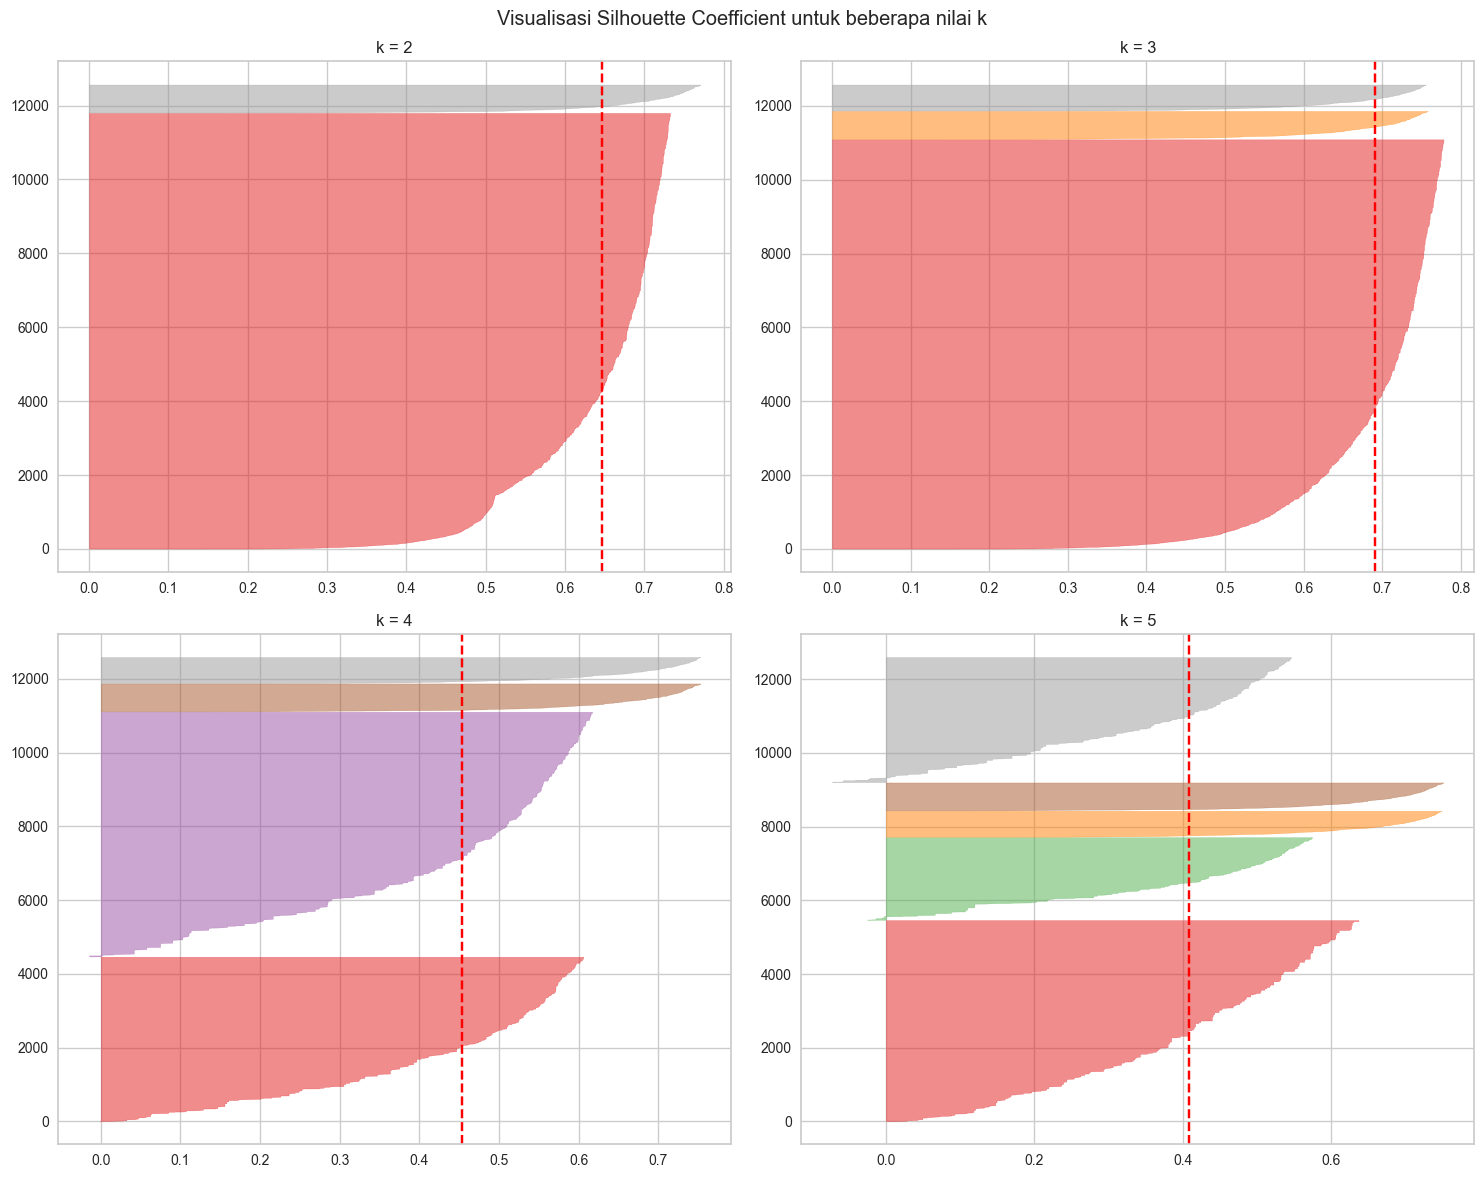

In [239]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# EDIT INI
selected = ['AGE', 'OUTCOME', "duration of intensive unit stay"]
feature = train[selected]
print(feature.head())

# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # EDIT INI
    scaler = MinMaxScaler()

    # Scale the features
    feature_scaled = scaler.fit_transform(feature)

    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(feature_scaled)
    silhouette_avg = silhouette_score(feature_scaled, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for i, k in enumerate([2, 3, 4, 5]):
    # Initialize the scaler
    scaler = MinMaxScaler()

    # Scale the features
    feature_scaled = scaler.fit_transform(feature)

    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    row = i // 2
    col = i % 2
    ax[row][col].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax=ax[row][col])
    visualizer.fit(feature_scaled)

plt.tight_layout()
plt.show()


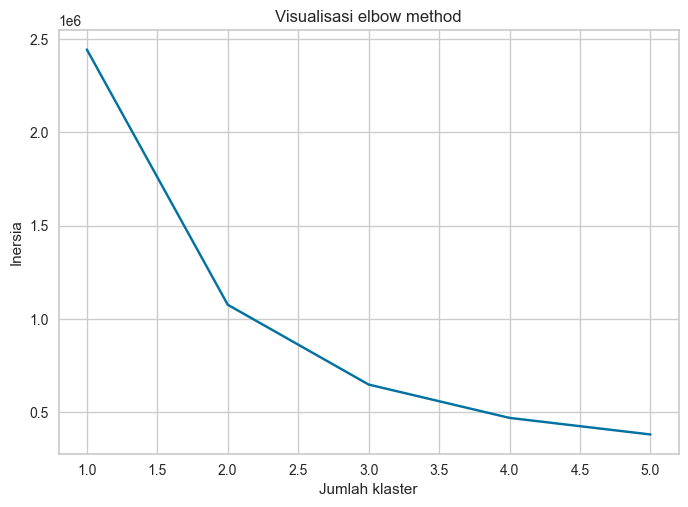

In [240]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(feature)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

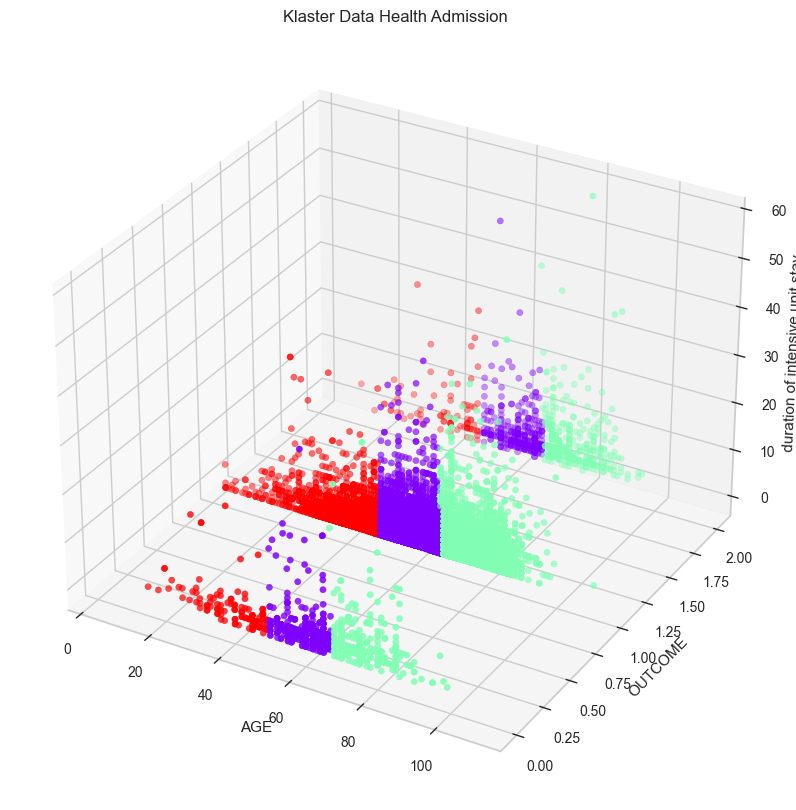

In [241]:
#Kalau 3 fitur

# Latih model sesuai jumlah klaster optimal

kmeans = KMeans(n_clusters=3, n_init=10)
assignment = kmeans.fit_predict(feature)
feature.head()
#Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(feature.copy())
df_with_clusters['cluster'] = assignment


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

#Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters[selected[0]]
y = df_with_clusters[selected[1]]
z = df_with_clusters[selected[2]]
cluster = df_with_clusters['cluster']
df_with_clusters.head()
# Memvisualisasikan hasilnya
ax.scatter(x, y,z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Health Admission")
plt.grid(False)
ax.set_xlabel(selected[0])
ax.set_ylabel(selected[1])
ax.set_zlabel(selected[2])

plt.show()

In [ ]:
# # Kalau 2 Fitur
# # Latih model sesuai jumlah klaster optimal
# kmeans = KMeans(n_clusters=2, n_init=10)
# assignment = kmeans.fit_predict(feature)
# feature.head()

# # Append hasil clustering ke dataframe
# df_with_clusters = feature.copy()
# df_with_clusters['cluster'] = assignment

# fig = plt.figure(figsize=(10, 10))
# ax = plt.gca()  # Get current axis for 2D plotting

# # Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
# x = df_with_clusters[selected[0]]
# y = df_with_clusters[selected[1]]
# cluster = df_with_clusters['cluster']

# # Memvisualisasikan hasilnya
# scatter = ax.scatter(x, y, c=cluster, cmap="rainbow")
# plt.title("Klaster Data Health Admission")
# plt.grid(False)
# ax.set_xlabel(selected[0])
# ax.set_ylabel(selected[1])

# # Adding a legend
# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# ax.add_artist(legend1)

# plt.show()